# California Houses

## Introduction
During the census in california in 1990 a lot of data was collected. The data provides data such as population, median income, median housing price for each block group in California. A block group describes the smallest georgraphical unit for which the US Census Bureau publishes sample data. A typically block group consists out of a population from 600 to 3000 people. In this notebook, I'm going to use this data to build a linear regression model to predict the median housing price. This model is going to be used later, to evaluate if it is worth to invest in inside this block group or not.

The data will be examined in accordance with the data science lifecycle as shown below.

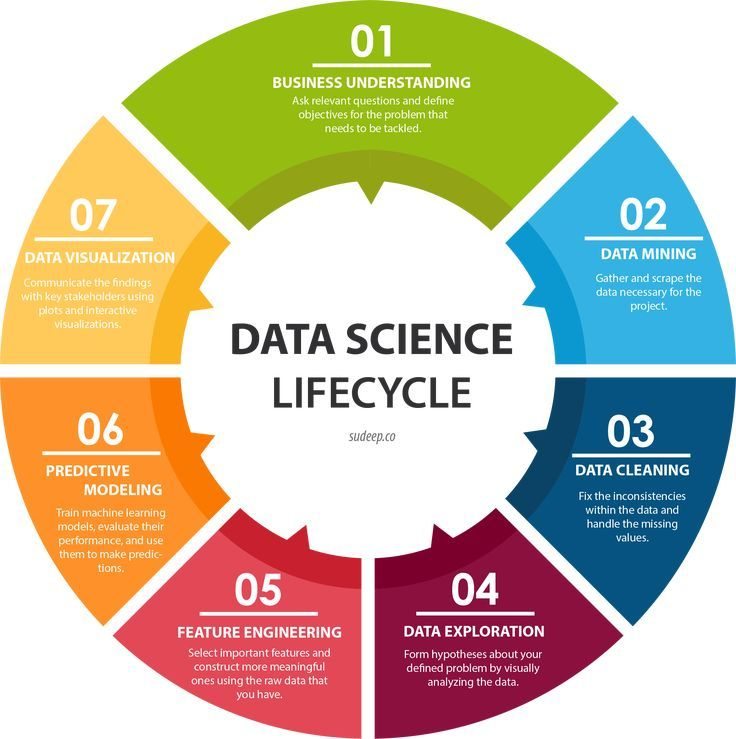






## 01 - Business Understanding

As mentioned within the introduction the dataset consists out of data collected during the census 1990 in California. The next step is to load the dataset and have a closer look to the single features as well as to our label.




In [178]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from scipy import stats
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

%matplotlib inline





In [3]:
data = pd.read_csv('housing.csv')

In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The data consists out of 10 columns and 20640 entries. In the next step I'm going to examine the meaning of the single columns:

### longitude/latitude
Both features provide the geographical position of the block in California.

### housing_median_age
Median age of a house within a block; a lower number is a newer building.

### total_rooms
Total number of rooms within a block.

### total_bedrooms
Total number of bedrooms within a block.

### population
Total number of people residing within a block.

### households
Total number of households, a group of people residing within a home unit, for a block.

### median_income
Median income for households within a block of houses (measured in tens of thousands of US Dollars).

### median_house_value
Median house value for households within a block (measured in US Dollars).

### ocean_proximity
Location of the house w.r.t ocean/sea.




## 02 - Data Mining
In this step I'd usually look for other data outside this dataset, and bring together with the existing data. In this notebook I'm going to use only the existing dataset and skip this step.

## 03 - Data Cleaning
In this step I'm going to examine all features and check them for inconsistancies

### Looking for missing values

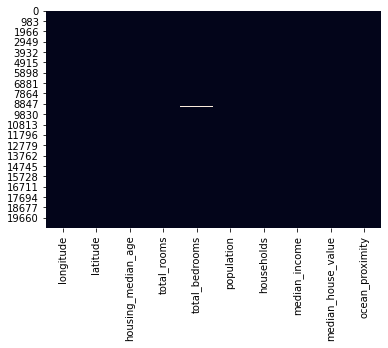

In [46]:
sns.heatmap(data.isnull(), cbar=False);

There are only missing values in total_bedrooms

### First Overview about all features and their distributions

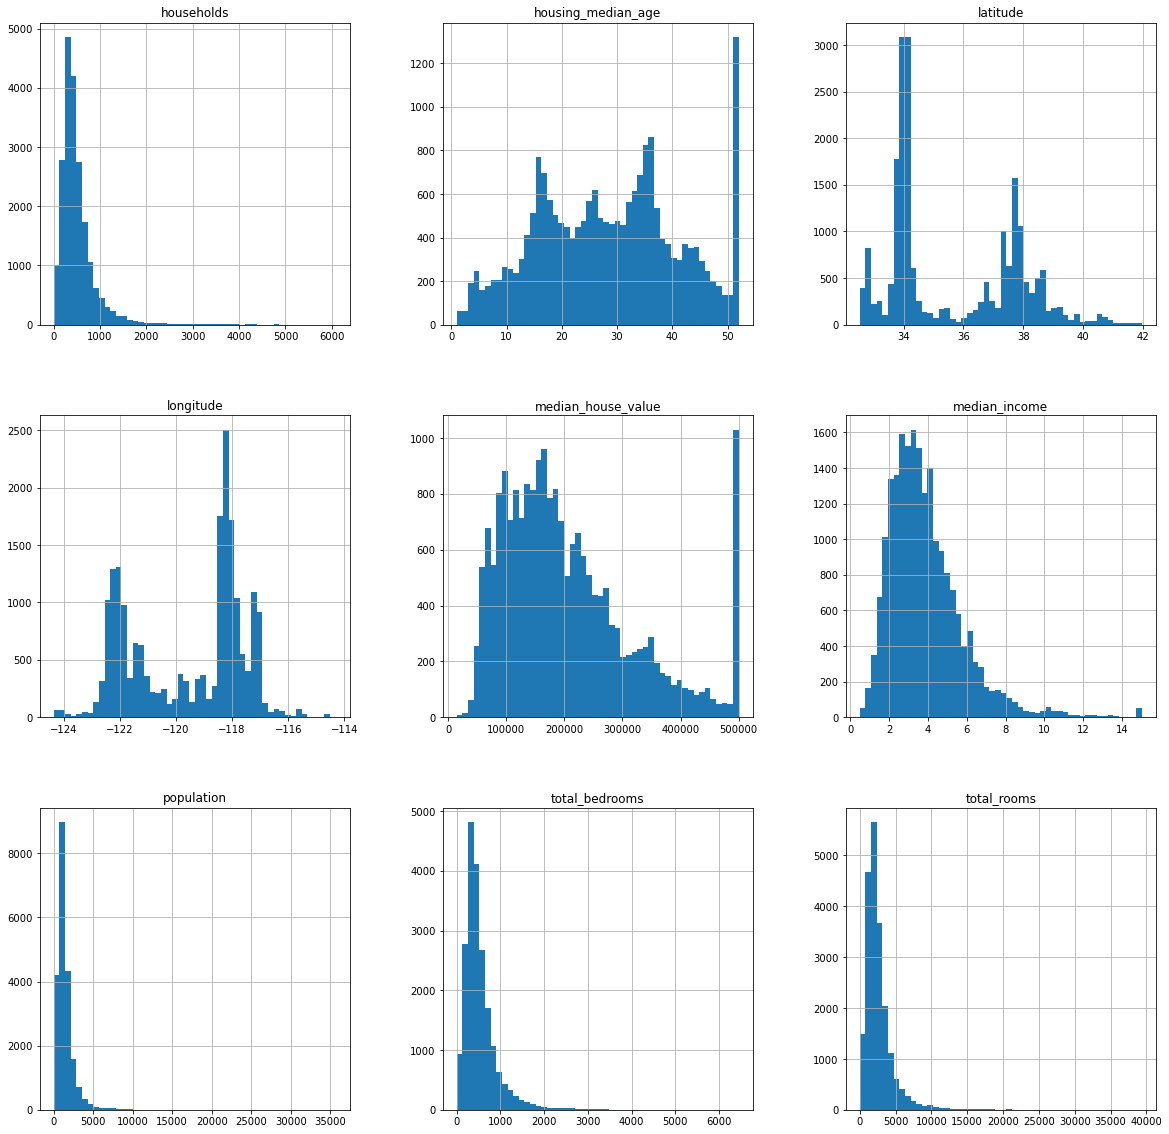

In [49]:
data.hist(bins=50, figsize=(20,20)) 
plt.show()


### households

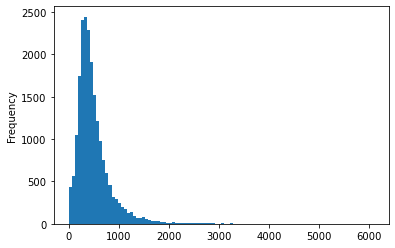

In [19]:
data.households.plot(kind= 'hist', bins = 100);

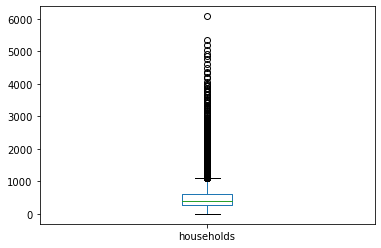

In [20]:
data.households.plot(kind= 'box');

In [21]:
data.households.describe()

count    20640.000000
mean       499.539680
std        382.329753
min          1.000000
25%        280.000000
50%        409.000000
75%        605.000000
max       6082.000000
Name: households, dtype: float64

### housing_median_age

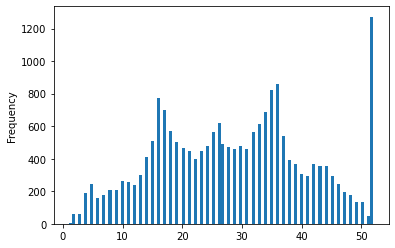

In [23]:
data.housing_median_age.plot(kind= 'hist', bins = 100);

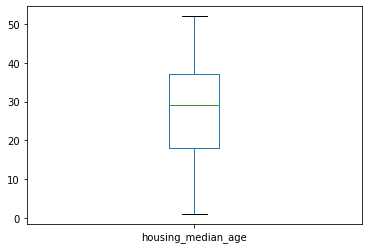

In [24]:
data.housing_median_age.plot(kind= 'box');

In [36]:
data.housing_median_age.describe()

count    20640.000000
mean        28.639486
std         12.585558
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

In [79]:
data.housing_median_age.value_counts()

52.0    1103
36.0     822
35.0     789
16.0     756
17.0     684
34.0     649
26.0     598
33.0     587
18.0     553
25.0     540
32.0     535
15.0     503
37.0     502
19.0     486
27.0     465
30.0     457
24.0     457
20.0     451
29.0     445
28.0     445
31.0     432
21.0     431
23.0     424
14.0     405
38.0     378
22.0     373
39.0     352
42.0     350
44.0     340
43.0     338
13.0     296
40.0     285
41.0     279
45.0     276
10.0     258
11.0     247
5.0      236
46.0     236
12.0     234
8.0      202
9.0      201
47.0     190
4.0      180
7.0      169
48.0     167
6.0      157
49.0     126
50.0     123
3.0       60
2.0       55
51.0      44
1.0        4
Name: housing_median_age, dtype: int64

As the age is capped at 52 years, I'm going to remove data with older houses in order to get a better result for the model.

In [80]:
data = data.drop(data[(data['housing_median_age'] == 52)].index)

In [81]:
data.housing_median_age.value_counts()

36.0    822
35.0    789
16.0    756
17.0    684
34.0    649
26.0    598
33.0    587
18.0    553
25.0    540
32.0    535
15.0    503
37.0    502
19.0    486
27.0    465
30.0    457
24.0    457
20.0    451
28.0    445
29.0    445
31.0    432
21.0    431
23.0    424
14.0    405
38.0    378
22.0    373
39.0    352
42.0    350
44.0    340
43.0    338
13.0    296
40.0    285
41.0    279
45.0    276
10.0    258
11.0    247
46.0    236
5.0     236
12.0    234
8.0     202
9.0     201
47.0    190
4.0     180
7.0     169
48.0    167
6.0     157
49.0    126
50.0    123
3.0      60
2.0      55
51.0     44
1.0       4
Name: housing_median_age, dtype: int64

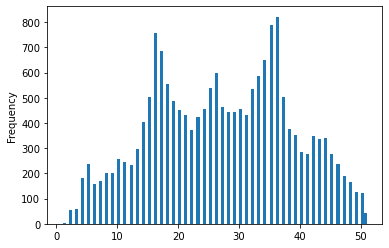

In [85]:
data.housing_median_age.plot(kind='hist', bins=100);

### total_rooms

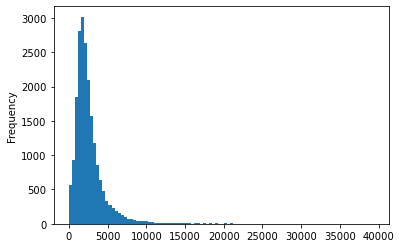

In [25]:
data.total_rooms.plot(kind= 'hist', bins = 100);

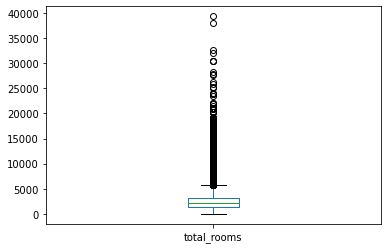

In [26]:
data.total_rooms.plot(kind= 'box');

In [37]:
data.total_rooms.describe()

count    20640.000000
mean      2635.763081
std       2181.615252
min          2.000000
25%       1447.750000
50%       2127.000000
75%       3148.000000
max      39320.000000
Name: total_rooms, dtype: float64

### total_bedrooms

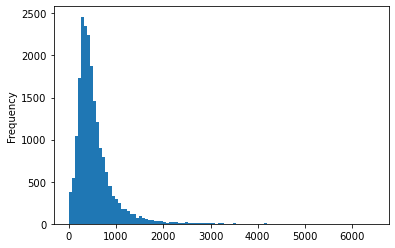

In [27]:
data.total_bedrooms.plot(kind= 'hist', bins = 100);

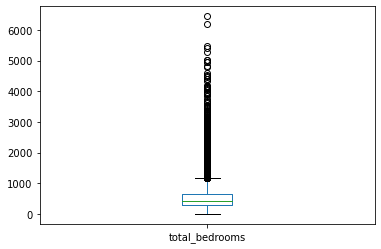

In [29]:
data.total_bedrooms.plot(kind= 'box');

In [38]:
data.total_bedrooms.describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

I'm going to fill the missing values for the total_bedrooms with the median value of 435.

In [50]:
data["total_bedrooms"].fillna(435, inplace = True) 

In [51]:
data.total_bedrooms.describe()

count    20640.000000
mean       536.838857
std        419.391878
min          1.000000
25%        297.000000
50%        435.000000
75%        643.250000
max       6445.000000
Name: total_bedrooms, dtype: float64

Now all missing values in the dataset have been fixed.

### population

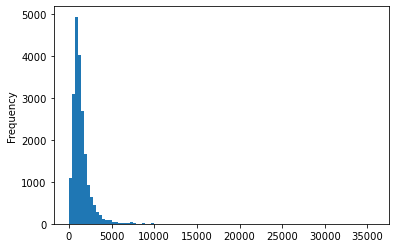

In [30]:
data.population.plot(kind= 'hist', bins = 100);

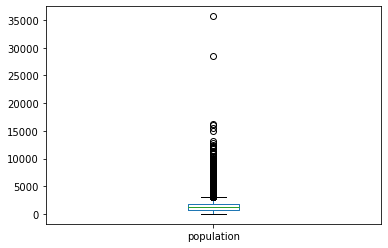

In [31]:
data.population.plot(kind= 'box');

In [39]:
data.population.describe()

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: population, dtype: float64

### median_income

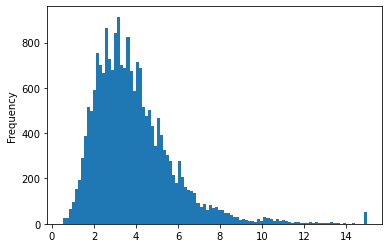

In [32]:
data.median_income.plot(kind= 'hist', bins = 100);

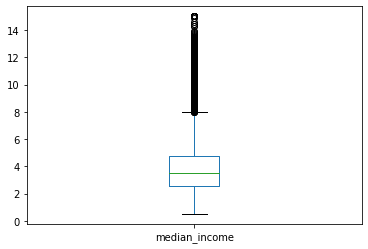

In [33]:
data.median_income.plot(kind= 'box');

In [40]:
data.median_income.describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

In [101]:
np.sum(data['median_income'] > 15)

2

In [104]:
np.sum(data['median_income'] < 0.5)

7

The income has been capped above 150000 USD and below 5000 USD. So I'm going to remove all rows with income above and below these values.

In [105]:
data = data.drop(data[(data['median_income'] > 15)].index)
data = data.drop(data[(data['median_income'] < 0.5)].index)

In [106]:
np.sum(data['median_income'] > 15)

0

In [107]:
np.sum(data['median_income'] < 0.5)

0

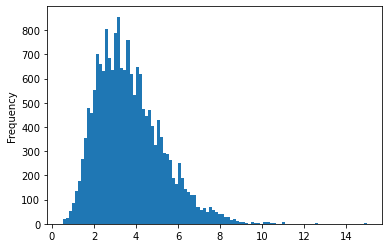

In [103]:
data.median_income.plot(kind='hist', bins=100);

### median_house_value

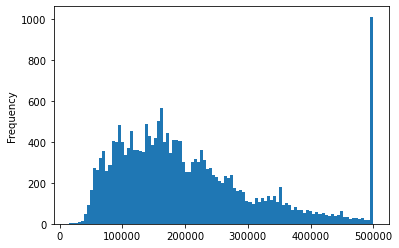

In [34]:
data.median_house_value.plot(kind= 'hist', bins = 100);

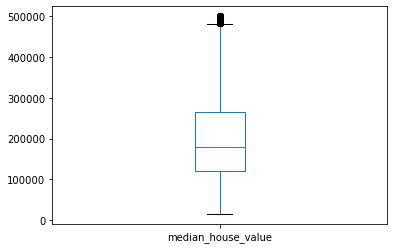

In [35]:
data.median_house_value.plot(kind= 'box');

In [41]:
data.median_house_value.describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [73]:
data.median_house_value.value_counts()

500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
303200.0      1
307900.0      1
383200.0      1
360800.0      1
405500.0      1
Name: median_house_value, Length: 3842, dtype: int64

As we can see, there is a high amount of houses with a price of 500001. I'm going to remove the related rows, since it will affect our model to much.

In [75]:
data = data.drop(data[(data['median_house_value'] == 500001)].index)


In [76]:
data.median_house_value.value_counts()

137500.0    122
162500.0    117
112500.0    103
187500.0     93
225000.0     92
           ... 
303200.0      1
307900.0      1
383200.0      1
360800.0      1
405500.0      1
Name: median_house_value, Length: 3841, dtype: int64

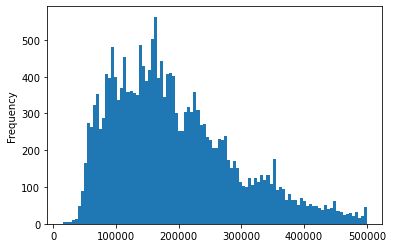

In [77]:
data.median_house_value.plot(kind= 'hist', bins = 100);

### ocean_proximity

ocean_proximity is kind of categorical data and has to be handled individually. I'm going to create dummie variables for the further handling.

In [54]:
data.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [66]:
for elem in data['ocean_proximity'].unique():
    data[str(elem)] =  data['ocean_proximity'] == elem
    
data['NEAR BAY'] = data['NEAR BAY'].astype(int)
data['<1H OCEAN'] = data['<1H OCEAN'].astype(int)
data['INLAND'] = data['INLAND'].astype(int)
data['NEAR OCEAN'] = data['NEAR OCEAN'].astype(int)
data['ISLAND'] = data['ISLAND'].astype(int)

data.rename(columns={'NEAR BAY':'near_bay'}, inplace=True)



In [68]:
data.rename(columns={'NEAR BAY':'near_bay'}, inplace=True)
data.rename(columns={'<1H OCEAN':'less_onehour_ocean'}, inplace=True)
data.rename(columns={'INLAND':'inland'}, inplace=True)
data.rename(columns={'NEAR OCEAN':'near_ocean'}, inplace=True)
data.rename(columns={'ISLAND':'island'}, inplace=True)

In [69]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,near_bay,less_onehour_ocean,inland,near_ocean,island
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,1,0,0,0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1,0,0,0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1,0,0,0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1,0,0,0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,1,0,0,0,0


In [71]:
del data['ocean_proximity']

## 04 - Data Exploration

In the following plot, I'm going to analyze visually dependencies between our features and our target median_house_price.

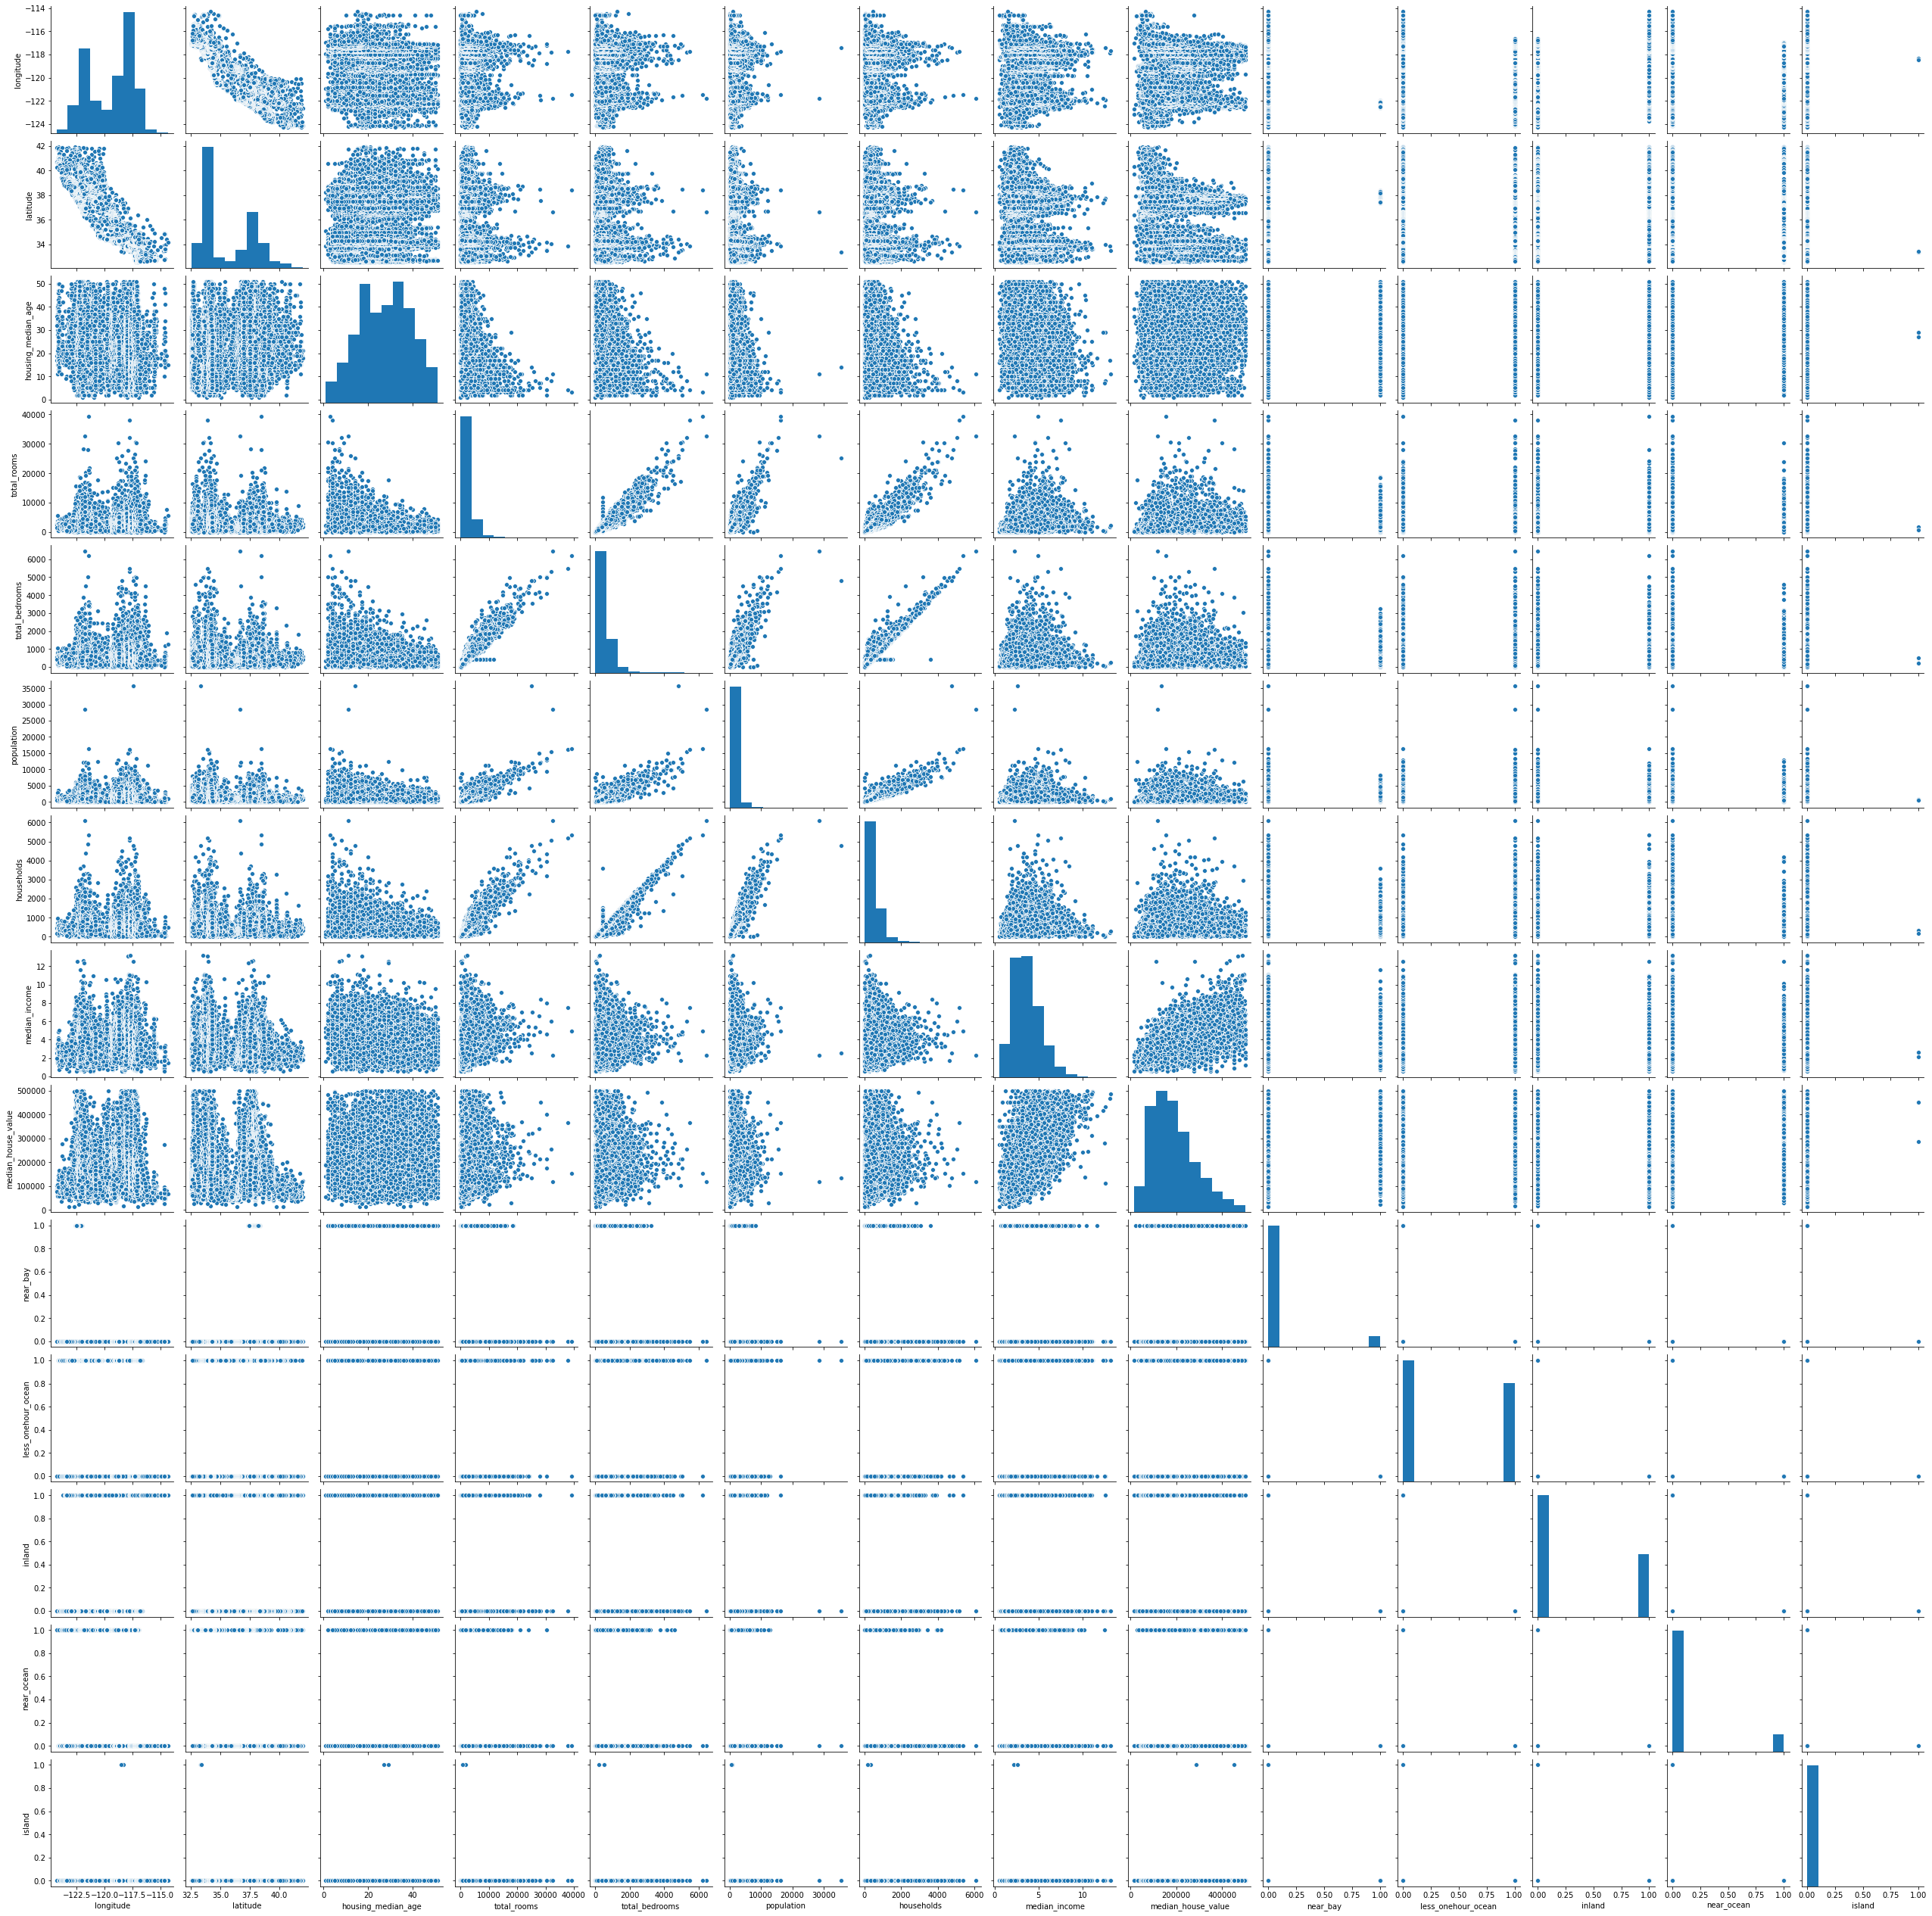

In [109]:
sns.pairplot(data);

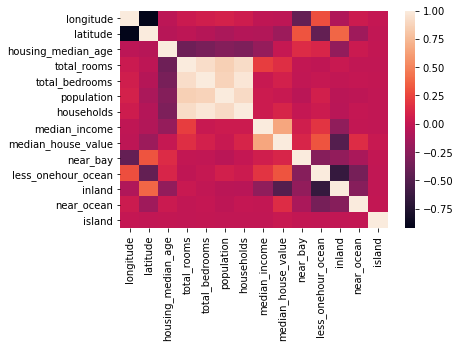

In [111]:
sns.heatmap(data.corr());

According to these plots the latitude has an influence on the median house value. For houses more east, the value sinks. The same influence counts for inland, that has in general a similar meaning. Since the inland side of california lays east and the westside borders on to the pacific.

The median income seams to effect the median house value most.

## 05 - Feature Engineering

### Totals
The total within a block are not good predictors, as the other values within these data sets are median values. I'll compare these total values and bring them into a proportion to households in order to create new features.

There will be two new features: bedrooms per household and rooms per household. The total amounts of households, bedrooms and rooms will disappear from the dataset.

In [113]:
data.eval('bedrooms_per_household = total_bedrooms / households', inplace = True)
data.eval('rooms_per_household = total_rooms / households', inplace = True)

In [114]:
data.drop('total_bedrooms', inplace=True, axis=1)
data.drop('total_rooms', inplace=True, axis=1)
data.drop('households', inplace=True, axis=1)

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18563 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   longitude               18563 non-null  float64
 1   latitude                18563 non-null  float64
 2   housing_median_age      18563 non-null  float64
 3   population              18563 non-null  float64
 4   median_income           18563 non-null  float64
 5   median_house_value      18563 non-null  float64
 6   near_bay                18563 non-null  int64  
 7   less_onehour_ocean      18563 non-null  int64  
 8   inland                  18563 non-null  int64  
 9   near_ocean              18563 non-null  int64  
 10  island                  18563 non-null  int64  
 11  bedrooms_per_household  18563 non-null  float64
 12  rooms_per_household     18563 non-null  float64
dtypes: float64(8), int64(5)
memory usage: 2.6 MB


### Standard distribution

For the model it is more confortable, if the variables are normally distributed. I'm going to use a logarithmic transformation, to try to bring the histogram in a more bellshaped form

In [125]:
data.var()

longitude                 3.922714e+00
latitude                  4.611670e+00
housing_median_age        1.306478e+02
population                1.352135e+06
median_income             2.448616e+00
median_house_value        9.172479e+09
near_bay                  7.724869e-02
less_onehour_ocean        2.473749e-01
inland                    2.248853e-01
near_ocean                1.096888e-01
island                    1.077354e-04
bedrooms_per_household    2.258649e-01
rooms_per_household       5.432494e+00
dtype: float64

In [133]:
data.mean()

longitude                   -119.484274
latitude                      35.592426
housing_median_age            26.985239
population                  1471.074503
median_income                  3.693248
median_house_value        189622.625492
near_bay                       0.084361
less_onehour_ocean             0.448634
inland                         0.341486
near_ocean                     0.125411
island                         0.000108
bedrooms_per_household         1.100900
rooms_per_household            5.384569
longitude_norm                      NaN
dtype: float64

In [142]:
data['longitude_norm'] = np.log(-(data.longitude))
data['latitude_norm'] = np.log(data.latitude)
data['housing_median_age_norm'] = np.log(data.housing_median_age)
data['population_norm'] = np.log(data.population)
data['median_income_norm'] = np.log(data.median_income)
data['median_house_value_norm'] = np.log(data.median_house_value)
data['bedrooms_per_household_norm'] = np.log(data.bedrooms_per_household)
data['rooms_per_household_norm'] = np.log(data.rooms_per_household)



In [144]:
data_norm = data[['longitude_norm','latitude_norm','housing_median_age_norm','population_norm','median_income_norm','median_house_value_norm','bedrooms_per_household_norm','rooms_per_household_norm']]

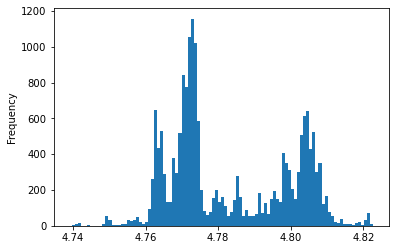

In [149]:
data['longitude_norm'].plot(kind='hist',bins=100);

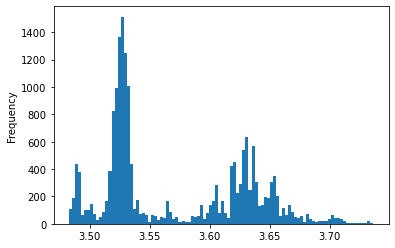

In [150]:
data['latitude_norm'].plot(kind='hist',bins=100);

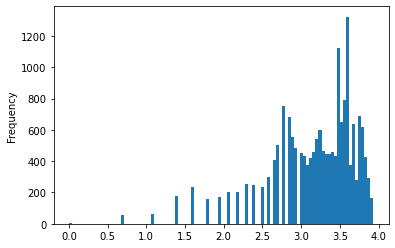

In [151]:
data['housing_median_age_norm'].plot(kind='hist',bins=100);

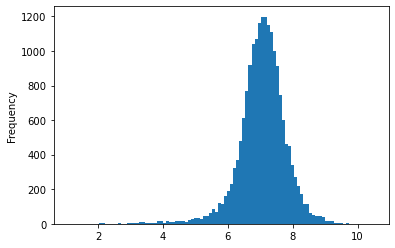

In [152]:
data['population_norm'].plot(kind='hist',bins=100);

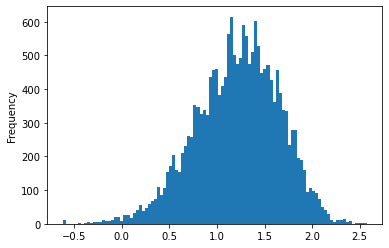

In [153]:
data['median_income_norm'].plot(kind='hist',bins=100);

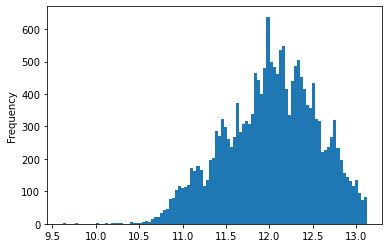

In [154]:
data['median_house_value_norm'].plot(kind='hist',bins=100);

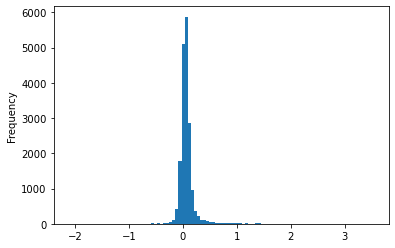

In [155]:
data['bedrooms_per_household_norm'].plot(kind='hist',bins=100);

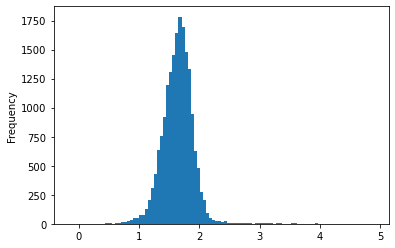

In [156]:
data['rooms_per_household_norm'].plot(kind='hist',bins=100);

## 06 - Predictive Modeling

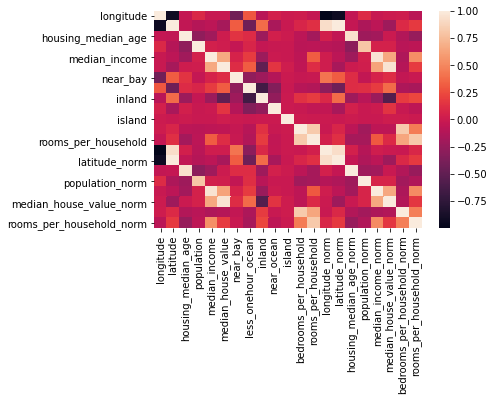

In [158]:
sns.heatmap(data.corr());

In [159]:
explanatory_vars = list(data.columns)
explanatory_vars = [e for e in explanatory_vars]
explanatory_vars

['longitude',
 'latitude',
 'housing_median_age',
 'population',
 'median_income',
 'median_house_value',
 'near_bay',
 'less_onehour_ocean',
 'inland',
 'near_ocean',
 'island',
 'bedrooms_per_household',
 'rooms_per_household',
 'longitude_norm',
 'latitude_norm',
 'housing_median_age_norm',
 'population_norm',
 'median_income_norm',
 'median_house_value_norm',
 'bedrooms_per_household_norm',
 'rooms_per_household_norm']

In [163]:
print('R squared for each possible explanatory variable:' )
for explanatory_var in explanatory_vars:
    model = 'median_house_value ~ {:}'.format(explanatory_var)
    rs = smf.ols(formula=model, data=data).fit().rsquared
    print('{:7s} \t \t= {:.3}'.format(explanatory_var, rs))

R squared for each possible explanatory variable:
longitude 	 	= 0.000492
latitude 	 	= 0.0296
housing_median_age 	 	= 0.000221
population 	 	= 0.00046
median_income 	 	= 0.438
median_house_value 	 	= 1.0
near_bay 	 	= 0.0124
less_onehour_ocean 	 	= 0.0996
inland  	 	= 0.25
near_ocean 	 	= 0.0221
island  	 	= 0.000377
bedrooms_per_household 	 	= 0.00385
rooms_per_household 	 	= 0.013
longitude_norm 	 	= 0.000503
latitude_norm 	 	= 0.0285
housing_median_age_norm 	 	= 4.81e-05
population_norm 	 	= 0.000765
median_income_norm 	 	= 0.393
median_house_value_norm 	 	= 0.91
bedrooms_per_household_norm 	 	= 0.0108
rooms_per_household_norm 	 	= 0.035


In [164]:
print('R squared for each possible explanatory variable:' )
for explanatory_var in explanatory_vars:
    model = 'median_house_value_norm ~ {:}'.format(explanatory_var)
    rs = smf.ols(formula=model, data=data).fit().rsquared
    print('{:7s} \t \t= {:.3}'.format(explanatory_var, rs))

R squared for each possible explanatory variable:
longitude 	 	= 1.11e-05
latitude 	 	= 0.0473
housing_median_age 	 	= 2.39e-06
population 	 	= 0.00268
median_income 	 	= 0.429
median_house_value 	 	= 0.91
near_bay 	 	= 0.0134
less_onehour_ocean 	 	= 0.143
inland  	 	= 0.323
near_ocean 	 	= 0.022
island  	 	= 0.00023
bedrooms_per_household 	 	= 0.00491
rooms_per_household 	 	= 0.00982
longitude_norm 	 	= 9.26e-06
latitude_norm 	 	= 0.0459
housing_median_age_norm 	 	= 0.000132
population_norm 	 	= 0.00428
median_income_norm 	 	= 0.429
median_house_value_norm 	 	= 1.0
bedrooms_per_household_norm 	 	= 0.0149
rooms_per_household_norm 	 	= 0.026


The new 'per household'-features didn't bring up any new findings. So the interesting features for the model are:

- 'near ocean'
- 'less one hour ocean'
- 'median income'
- 'inland'
- 'latitude'

### Creating dataset

In [180]:
features = ["near_ocean", "less_onehour_ocean", "median_income"]
X2 = data[features]
y = data["median_house_value"]

In [181]:

# Splitting the dataset into train and validation sets
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.3, random_state = 10)

### Performing linear regression

In [182]:
#Training a Linear Regression Model
regressor = LinearRegression()

# Fitting the training data to our model
regressor.fit(X_train, y_train)

# Predicting price for the Validation set
y_pred = regressor.predict(X_test)

# Scoring the model

# R2 score closer to 1 is a good model
print(f"R2 score: {r2_score(y_test, y_pred)}")

# MSE score closer to zero is a good model
bprint(f"MSE score: {mean_squared_error(y_test, y_pred)}")

R2 score: 0.5178373454885901
MSE score: 4366737553.126289


In [183]:
coeff_df = pd.DataFrame(regressor.coef_, X2.columns, columns=["Coefficient"])
print(coeff_df.round(3))

                    Coefficient
near_ocean            74427.992
less_onehour_ocean    56302.606
median_income         37226.144


In [184]:
test_df = pd.DataFrame({"Actual": np.exp(y_test), "Predicted": np.exp(y_pred)})
test_df["Diff"] = test_df.Actual - test_df.Predicted
test_df = test_df.round().sample(15)
test_df

/Users/felixseeliger/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-184-74361515503b>:1: RuntimeWarning: overflow encountered in exp
  test_df = pd.DataFrame({"Actual": np.exp(y_test), "Predicted": np.exp(y_pred)})


,Actual,Predicted,Diff
4097,inf,inf,NaN
1596,inf,inf,NaN
11106,inf,inf,NaN
8630,inf,inf,NaN
2239,inf,inf,NaN
13883,inf,inf,NaN
3915,inf,inf,NaN
11868,inf,inf,NaN
19216,inf,inf,NaN
11165,inf,inf,NaN


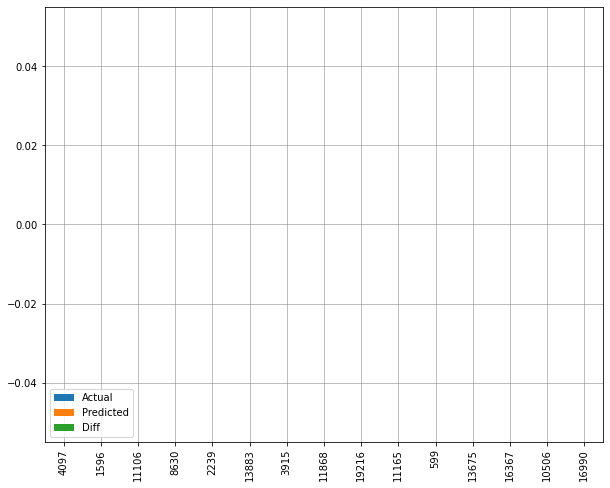

In [185]:
test_df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## 07 - Data Visualization 

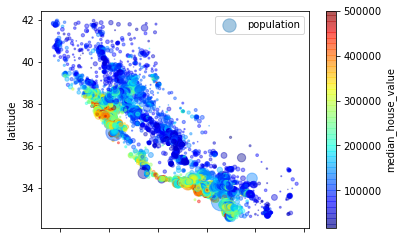

In [192]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=data["population"]/100, label="population", c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,);
plt.legend();